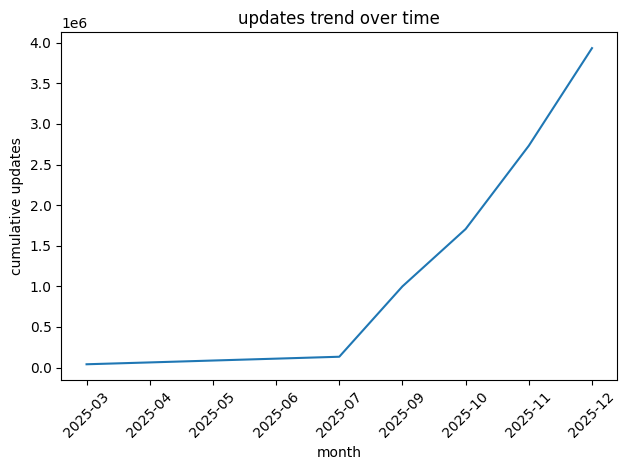

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=pd.concat([demographic_df,biometric_df])
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M").astype(str)

trend=updates.groupby("month").size().sort_index().cumsum()

plt.figure()
plt.plot(trend.index,trend.values)
plt.xticks(rotation=45)
plt.xlabel("month")
plt.ylabel("cumulative updates")
plt.title("updates trend over time")
plt.tight_layout()
plt.show()
